In [1]:
import numpy as np
import pandas as pd
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
cd ..

/Users/josephmchugh/code/flatiron_project_2/flatiron_mod2_project_kch


In [3]:
df = pd.read_csv('kc_cleaned.csv')
df = df.drop(['lat','long','grade','sqft_lot15','sqft_living15'],axis=1)

In [4]:
rows = df[df['price'] > 4000000].index
df.drop(rows,inplace=True)

In [5]:
x_cols = df.columns[1:]
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'zipcode', 'has_waterfront', 'has_basement',
       'has_renovation', 'eff_built'],
      dtype='object')

In [6]:
df_ohe = pd.get_dummies(df[x_cols], columns = ['zipcode'], drop_first=True)
df_ohe.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,has_waterfront,has_basement,has_renovation,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
bedrooms,1.000000,0.464383,0.579427,0.032158,0.157421,0.075867,0.026750,-0.007762,0.157448,0.016259,...,-0.031069,-0.012894,-0.008336,0.000669,-0.045636,0.002812,-0.008016,0.005295,-0.023551,-0.021227
bathrooms,0.464383,1.000000,0.693883,0.085804,0.488000,0.169409,-0.127676,0.047676,0.124620,0.053469,...,-0.062959,-0.018182,-0.048403,-0.027814,-0.081029,-0.006434,-0.047122,-0.023162,-0.046432,0.008264
sqft_living,0.579427,0.693883,1.000000,0.174598,0.355411,0.276101,-0.059169,0.088364,0.199901,0.045173,...,-0.058492,-0.026502,-0.048265,-0.001095,-0.075460,0.029740,-0.042549,-0.024110,-0.041978,0.011432
sqft_lot,0.032158,0.085804,0.174598,1.000000,-0.008792,0.074777,-0.008755,0.020665,-0.035104,0.004934,...,-0.017046,-0.007617,-0.017072,-0.003906,-0.010366,-0.008414,-0.018151,-0.009546,-0.012637,-0.028459
floors,0.157421,0.488000,0.355411,-0.008792,1.000000,0.022839,-0.293445,0.016835,-0.247480,-0.009825,...,-0.057366,-0.023577,-0.073498,-0.047677,-0.073359,-0.039381,-0.062724,-0.037807,-0.054038,-0.009287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,0.002812,-0.006434,0.029740,-0.008414,-0.039381,0.083128,0.014146,-0.003543,0.043064,0.017065,...,-0.012714,-0.005626,-0.015863,-0.011931,-0.012282,1.000000,-0.012119,-0.008706,-0.012534,-0.013348
zipcode_98178,-0.008016,-0.047122,-0.042549,-0.018151,-0.062724,0.043940,-0.015219,0.038279,0.022759,0.000014,...,-0.012890,-0.005704,-0.016082,-0.012095,-0.012452,-0.012119,1.000000,-0.008826,-0.012707,-0.013532
zipcode_98188,0.005295,-0.023162,-0.024110,-0.009546,-0.037807,-0.008887,-0.009676,-0.006457,-0.002812,-0.005366,...,-0.009259,-0.004097,-0.011552,-0.008689,-0.008945,-0.008706,-0.008826,1.000000,-0.009128,-0.009721
zipcode_98198,-0.023551,-0.046432,-0.041978,-0.012637,-0.054038,0.054241,0.005800,0.036446,-0.008207,-0.001376,...,-0.013331,-0.005899,-0.016632,-0.012509,-0.012878,-0.012534,-0.012707,-0.009128,1.000000,-0.013995


In [7]:
#Running the regression using sklearn with a test-train split:
from sklearn.linear_model import LinearRegression

x = df_ohe
y = df.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=55)
lr = LinearRegression()
reg = lr.fit(x_train,y_train)
reg.score(x_train, y_train)

0.8017447171564817

In [8]:
from statsmodels.api import OLS
x = x_train
x_const = sm.add_constant(x)
y = np.array(y_train)
model = sm.OLS(y, x_const, hasconst=True)
fitted_model = model.fit()
fitted_model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     977.9
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:59:24   Log-Likelihood:            -2.5977e+05
No. Observations:               19427   AIC:                         5.197e+05
Df Residuals:                   19346   BIC:                         5.203e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.383e+05   1.26e+04    -11.001      0.000   -1.63e+05   -1.14e+05
bedrooms       -2.972e+04   1538.021    -19.323      0.000   -3.27e+04   -2.67e+04
bathrooms       3.081e+04   2394.430     12.868      0.000    2.61e+04    3.55e+04
sqft_living      230.5345      2.132    108.138      0.000     226.356     234.713
sqft_lot           0.2737      0.030      9.100      0.000       0.215       0.333
floors         -2.667e+04   3109.206     -8.578      0.000   -3.28e+04   -2.06e+04
view             6.38e+04   1726.092     36.964      0.000    6.04e+04    6.72e+04
condition        2.35e+04   1946.203     12.073      0.000    1.97e+04    2.73e+04
has_waterfront  6.156e+05   1.52e+04     40.606      0.000    5.86e+05    6.45e+05
has_basement   -6.158e+04   2770.729    -22.225      0.000    -6.7e+04   -5.61e+04
has_renovation   3.73e+04   6527.964      5.714      0.000    2.45e+04    5.01e+04
eff_built        -84.2003     63.937     -1.317      0.188    -209.523      41.122
zipcode_98002   6872.4466   1.46e+04      0.470      0.638   -2.18e+04    3.55e+04
zipcode_98003  -2340.8443   1.33e+04     -0.176      0.860   -2.84e+04    2.37e+04
zipcode_98004   8.002e+05   1.28e+04     62.500      0.000    7.75e+05    8.25e+05
zipcode_98005   3.556e+05   1.54e+04     23.062      0.000    3.25e+05    3.86e+05
zipcode_98006   3.167e+05   1.16e+04     27.332      0.000    2.94e+05    3.39e+05
zipcode_98007   2.834e+05   1.68e+04     16.891      0.000    2.51e+05    3.16e+05
zipcode_98008   2.761e+05   1.34e+04     20.662      0.000     2.5e+05    3.02e+05
zipcode_98010   5.135e+04   1.89e+04      2.716      0.007    1.43e+04    8.84e+04
zipcode_98011   1.428e+05   1.46e+04      9.787      0.000    1.14e+05    1.71e+05
zipcode_98014   9.026e+04   1.76e+04      5.124      0.000    5.57e+04    1.25e+05
zipcode_98019   7.724e+04   1.48e+04      5.208      0.000    4.82e+04    1.06e+05
zipcode_98022  -2.789e+04   1.39e+04     -2.013      0.044    -5.5e+04    -728.713
zipcode_98023  -1.202e+04   1.15e+04     -1.048      0.295   -3.45e+04    1.05e+04
zipcode_98024   1.501e+05   2.03e+04      7.403      0.000     1.1e+05     1.9e+05
zipcode_98027   1.912e+05    1.2e+04     15.991      0.000    1.68e+05    2.15e+05
zipcode_98028   1.332e+05   1.32e+04     10.078      0.000    1.07e+05    1.59e+05
zipcode_98029   2.446e+05   1.27e+04     19.212      0.000     2.2e+05     2.7e+05
zipcode_98030   8954.7881   1.35e+04      0.665      0.506   -1.74e+04    3.53e+04
zipcode_98031   1.582e+04   1.33e+04      1.190      0.234   -1.02e+04    4.19e+04
zipcode_98032   1.634e+04   1.69e+04      0.968      0.333   -1.67e+04    4.94e+04
zipcode_98033   3.876e+05   1.18e+04     32.855      0.000    3.64e+05    4.11e+05
zipcode_98034   2.182e+05   1.12e+04     19.463      0.000    1.96e+05     2.4e+05
zipcode_9803

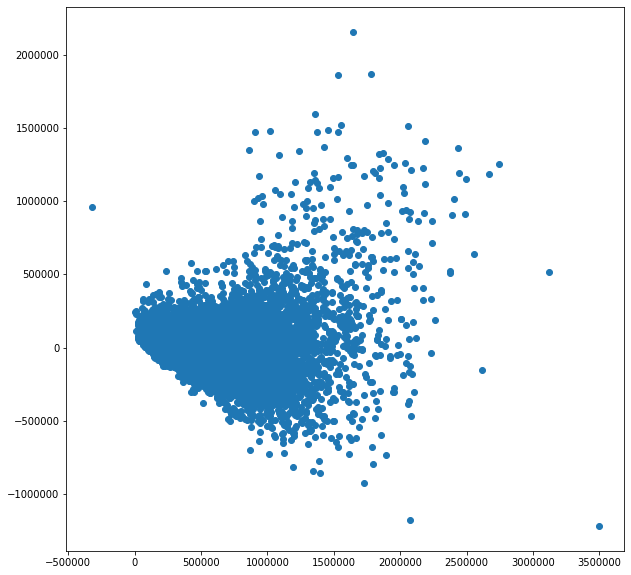

In [9]:
y_predict = fitted_model.predict(x_const)
residuals = y - y_predict
plt.figure(figsize=(10,10))
plt.scatter(y_predict, residuals)
plt.show()